In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


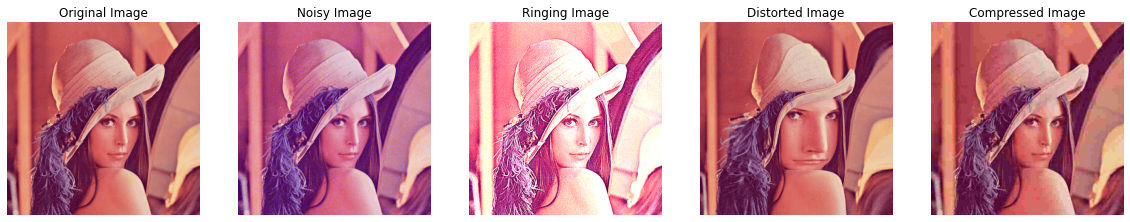

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('image.png')

# Add noise
noise = np.zeros(img.shape, dtype=np.uint8)
cv2.randn(noise, 0, 100)
noisy_img = cv2.add(img, noise)

# Apply ringing
kernel = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])
ringing_img = cv2.filter2D(img, -1, kernel)

# Apply distortion
rows, cols, _ = img.shape
distorted_img = np.zeros(img.shape, dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        x_offset = int(20.0 * np.sin(2 * np.pi * j / 200.0))
        y_offset = int(20.0 * np.sin(2 * np.pi * i / 200.0))
        distorted_img[i,j,:] = img[(i+y_offset)%rows, (j+x_offset)%cols,:]

# Apply compression artifacts
_, compressed = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
compressed_img = cv2.imdecode(compressed, cv2.IMREAD_COLOR)

# Display images using matplotlib
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.set_facecolor('white')

for ax in axs:
    ax.axis('off')

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(ringing_img, cv2.COLOR_BGR2RGB))
axs[3].imshow(cv2.cvtColor(distorted_img, cv2.COLOR_BGR2RGB))
axs[4].imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].set_title('Noisy Image')
axs[2].set_title('Ringing Image')
axs[3].set_title('Distorted Image')
axs[4].set_title('Compressed Image')

plt.show()


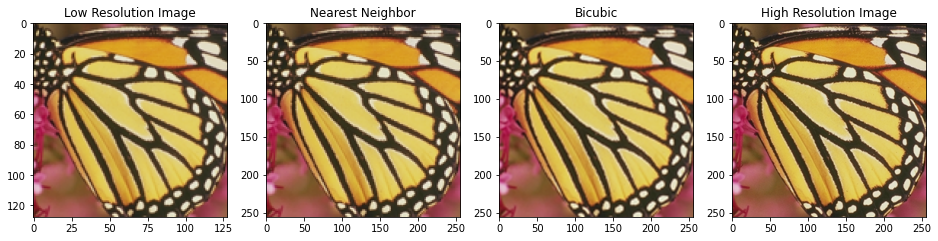

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/img_003_SRF_2_LR.png')

# Resize image using different interpolation methods
nearest_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
bicubic_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
target_img = cv2.imread('/content/img_003_SRF_2_HR.png')

# Create figure
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.set_facecolor('white')
plt.subplots_adjust(wspace=0.2)

# LR image
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Low Resolution Image')

# Nearest neighbor image
axs[1].imshow(cv2.cvtColor(nearest_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Nearest Neighbor')

# Bicubic image
axs[2].imshow(cv2.cvtColor(bicubic_img, cv2.COLOR_BGR2RGB))
axs[2].set_title('Bicubic')

# HR image
axs[3].imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
axs[3].set_title('High Resolution Image')

plt.show()


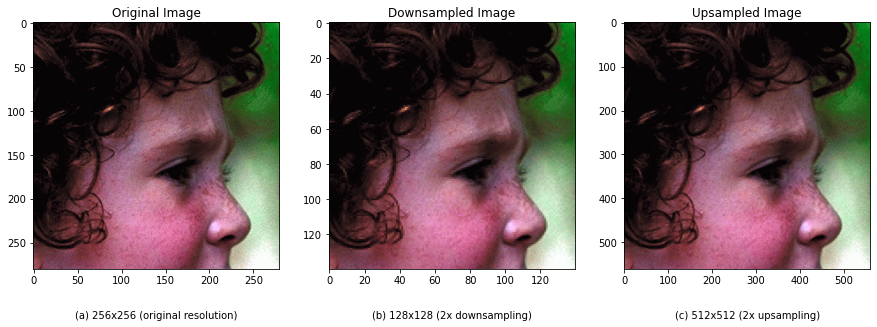

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/img_004_SRF_2_HR.png')
# Downsample the image using bicubic interpolation
downsampled_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

# Upsample the downsampled image using nearest neighbor interpolation
upsampled_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

# Display images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].text(0.5, -0.2, '(a) 256x256 (original resolution)', transform=ax[0].transAxes, ha='center')
ax[1].imshow(cv2.cvtColor(downsampled_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Downsampled Image')
ax[1].text(0.5, -0.2, '(b) 128x128 (2x downsampling)', transform=ax[1].transAxes, ha='center')
ax[2].imshow(cv2.cvtColor(upsampled_img, cv2.COLOR_BGR2RGB))
ax[2].set_title('Upsampled Image')
ax[2].text(0.5, -0.2, '(c) 512x512 (2x upsampling)', transform=ax[2].transAxes, ha='center')
plt.show()


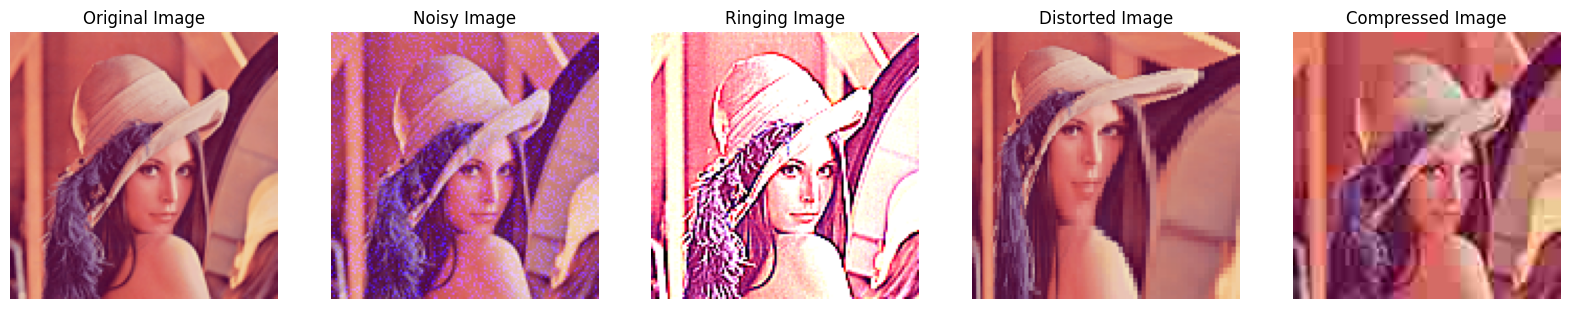

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('lenna.png')

# Add noise
noise = np.zeros(img.shape, dtype=np.uint8)
cv2.randn(noise, 0, 100) # mean=0, std=100
noisy_img = cv2.add(img, noise)

# Apply ringing
kernel = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])
ringing_img = cv2.filter2D(img, -1, kernel)

# Apply distortion
rows, cols, _ = img.shape
distorted_img = np.zeros(img.shape, dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        x_offset = int(20.0 * np.sin(2 * np.pi * j / 200.0))
        y_offset = int(20.0 * np.sin(2 * np.pi * i / 200.0))
        distorted_img[i,j,:] = img[(i+y_offset)%rows, (j+x_offset)%cols,:]

# Apply compression artifacts
_, compressed = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
compressed_img = cv2.imdecode(compressed, cv2.IMREAD_COLOR)

# Display images using matplotlib
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(ringing_img, cv2.COLOR_BGR2RGB))
axs[3].imshow(cv2.cvtColor(distorted_img, cv2.COLOR_BGR2RGB))
axs[4].imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].set_title('Noisy Image')
axs[2].set_title('Ringing Image')
axs[3].set_title('Distorted Image')
axs[4].set_title('Compressed Image')

# Remove axis from subplots
for ax in axs:
    ax.axis('off')

# Set figure background color to white
fig.set_facecolor('white')

plt.show()


cv2.imwrite("lenna_noise.png", noisy_img)
cv2.imwrite("lenna_ringing.png", ringing_img)
cv2.imwrite("lenna_distorted.png", distorted_img)
cv2.imwrite("lenna_compressed.png", compressed_img)


In [ ]:
!pip install piqa
!pip install pyiqa
!pip install lpips

In [2]:
import os
import glob
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from piqa import PSNR, SSIM, LPIPS
import pyiqa
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv

In [3]:
# Define the metric functions
def calculate_psnr(img1, img2):
    psnr = PSNR()
    l = psnr(img1, img2)
    return l.item()

def calculate_ssim(img1, img2):
    ssim = SSIM().cuda()
    l = ssim(img1, img2)
    return l.item()

def calculate_lpips(img1, img2):
    lpips_piqa = LPIPS().cuda()
    l = lpips_piqa(img1, img2)
    return l.item()

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

lpips_metric = pyiqa.create_metric('lpips', device=torch.device('cuda'))
niqe_metric = pyiqa.create_metric('niqe', device=torch.device('cuda'))
brisque_metric = pyiqa.create_metric('brisque', as_loss=True, device=torch.device('cuda'))

# Load image
img = cv2.imread('lenna_swinIR.png', cv2.COLOR_BGR2RGB).astype(np.float32) / 255.
img = np.transpose(img if img.shape[2] == 1 else img[:, :, [2, 1, 0]], (2, 0, 1))
img = torch.from_numpy(img).float().unsqueeze(0).to("cuda")

noisy_img = cv2.imread('lenna_noise_swinIR.png', cv2.COLOR_BGR2RGB).astype(np.float32) / 255.
noisy_img = np.transpose(noisy_img if noisy_img.shape[2] == 1 else noisy_img[:, :, [2, 1, 0]], (2, 0, 1))
noisy_img = torch.from_numpy(noisy_img).float().unsqueeze(0).to("cuda")

ringing_img = cv2.imread('lenna_ringing_swinIR.png', cv2.COLOR_BGR2RGB).astype(np.float32) / 255.
ringing_img = np.transpose(ringing_img if ringing_img.shape[2] == 1 else ringing_img[:, :, [2, 1, 0]], (2, 0, 1))
ringing_img = torch.from_numpy(ringing_img).float().unsqueeze(0).to("cuda")

distorted_img = cv2.imread('lenna_distorted_swinIR.png', cv2.COLOR_BGR2RGB).astype(np.float32) / 255.
distorted_img = np.transpose(distorted_img if distorted_img.shape[2] == 1 else distorted_img[:, :, [2, 1, 0]], (2, 0, 1))
distorted_img = torch.from_numpy(distorted_img).float().unsqueeze(0).to("cuda")

compressed_img = cv2.imread('lenna_compressed_swinIR.png', cv2.COLOR_BGR2RGB).astype(np.float32) / 255.
compressed_img = np.transpose(compressed_img if compressed_img.shape[2] == 1 else compressed_img[:, :, [2, 1, 0]], (2, 0, 1))
compressed_img = torch.from_numpy(compressed_img).float().unsqueeze(0).to("cuda")

target_img = cv2.imread('lenna_target.png', cv2.COLOR_BGR2RGB).astype(np.float32) / 255.
target_img = np.transpose(target_img if target_img.shape[2] == 1 else target_img[:, :, [2, 1, 0]], (2, 0, 1))
target_img = torch.from_numpy(target_img).float().unsqueeze(0).to("cuda")



psnr_target_input = calculate_psnr(img, target_img)
psnr_target_noise = calculate_psnr(noisy_img, target_img)
psnr_target_ringing = calculate_psnr(ringing_img, target_img)
psnr_target_distorted = calculate_psnr(distorted_img, target_img)
psnr_target_compressed = calculate_psnr(compressed_img, target_img)
psnr_target = calculate_psnr(target_img, target_img)

lpips_target_input = lpips_metric(img, target_img).item()
lpips_target_noise = lpips_metric(noisy_img, target_img).item()
lpips_target_ringing = lpips_metric(ringing_img, target_img).item()
lpips_target_distorted = lpips_metric(distorted_img, target_img).item()
lpips_target_compressed = lpips_metric(compressed_img, target_img).item()
lpips_target = lpips_metric(target_img, target_img)

niqe_score_img = niqe_metric(img).item()
brisque_score_img = brisque_metric(img).item()

niqe_score_noise = niqe_metric(noisy_img).item()
brisque_score_noise = brisque_metric(noisy_img).item()

niqe_score_ringing = niqe_metric(ringing_img).item()
brisque_score_ringing = brisque_metric(ringing_img).item()

niqe_score_distorted = niqe_metric(distorted_img).item()
brisque_score_distorted = brisque_metric(distorted_img).item()

niqe_score_compressed = niqe_metric(compressed_img).item()
brisque_score_compressed = brisque_metric(compressed_img).item()

niqe_score_target = niqe_metric(target_img).item()
brisque_score_target= brisque_metric(target_img).item()



img_gray = cv2.imread('lenna_swinIR.png', cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.
img_gray = np.transpose(img_gray if img_gray.shape[2] == 1 else img_gray[:, :, [2, 1, 0]], (2, 0, 1))
img_gray = torch.from_numpy(img_gray).float().unsqueeze(0).to("cuda")

noisy_img_gray = cv2.imread('lenna_noise_swinIR.png', cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.
noisy_img_gray = np.transpose(noisy_img_gray if noisy_img_gray.shape[2] == 1 else noisy_img_gray[:, :, [2, 1, 0]], (2, 0, 1))
noisy_img_gray = torch.from_numpy(noisy_img_gray).float().unsqueeze(0).to("cuda")

ringing_img_gray = cv2.imread('lenna_ringing_swinIR.png', cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.
ringing_img_gray = np.transpose(ringing_img_gray if ringing_img_gray.shape[2] == 1 else ringing_img_gray[:, :, [2, 1, 0]], (2, 0, 1))
ringing_img_gray = torch.from_numpy(ringing_img_gray).float().unsqueeze(0).to("cuda")

distorted_img_gray = cv2.imread('lenna_distorted_swinIR.png', cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.
distorted_img_gray = np.transpose(distorted_img_gray if distorted_img_gray.shape[2] == 1 else distorted_img_gray[:, :, [2, 1, 0]], (2, 0, 1))
distorted_img_gray = torch.from_numpy(distorted_img_gray).float().unsqueeze(0).to("cuda")

compressed_img_gray = cv2.imread('lenna_compressed_swinIR.png', cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.
compressed_img_gray = np.transpose(compressed_img_gray if compressed_img_gray.shape[2] == 1 else compressed_img_gray[:, :, [2, 1, 0]], (2, 0, 1))
compressed_img_gray = torch.from_numpy(compressed_img_gray).float().unsqueeze(0).to("cuda")

target_img_gray = cv2.imread('lenna_target.png', cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.
target_img_gray = np.transpose(target_img_gray if target_img_gray.shape[2] == 1 else target_img_gray[:, :, [2, 1, 0]], (2, 0, 1))
target_img_gray = torch.from_numpy(target_img_gray).float().unsqueeze(0).to("cuda")
target_img_gray = target_img_gray.requires_grad_()

ssim_target_input = calculate_ssim(img_gray, target_img_gray)
ssim_target_noise = calculate_ssim(noisy_img_gray, target_img_gray)
ssim_target_ringing = calculate_ssim(ringing_img_gray, target_img_gray)
ssim_target_distorted = calculate_ssim(distorted_img_gray, target_img_gray)
ssim_target_compressed = calculate_ssim(compressed_img_gray, target_img_gray)
ssim_target = calculate_ssim(target_img_gray, target_img_gray)

# Create a figure showing the input, output, and target images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,8))
fig.tight_layout(pad=5.0)
fig.suptitle(f"SwinIR with Degradations",)
fig.set_facecolor('white')

input_img = img.squeeze(0).permute(1,2,0).cpu().detach().numpy()
noisy_img = noisy_img.squeeze(0).permute(1,2,0).cpu().detach().numpy()
ringing_img = ringing_img.squeeze(0).permute(1,2,0).cpu().detach().numpy()
distorted_img = distorted_img.squeeze(0).permute(1,2,0).cpu().detach().numpy()
#compressed_img = compressed.squeeze(0).permute(1,2,0).cpu().detach().numpy()
target_img = target_img.squeeze(0).permute(1,2,0).cpu().detach().numpy()

# # Plot the input, output, and target images
font_title = {'fontsize': 12, 'fontweight': 'bold'}
ax[0].imshow(input_img)
ax[0].set_title(f"SwinIR\n\nPSNR = {psnr_target_input:.2f}\nSSIM = {ssim_target_input:.2f}\nLPIPS = {lpips_target_input:.2f}\nNIQE = {niqe_score_img:.2f}\nBRISQUE = {brisque_score_img:.2f}\n", fontdict=font_title)
ax[1].imshow(noisy_img)
ax[1].set_title(f"Noisy\n\nPSNR = {psnr_target_noise:.2f}\nSSIM = {ssim_target_noise:.2f}\nLPIPS = {lpips_target_noise:.2f}\nNIQE = {niqe_score_noise:.2f}\nBRISQUE = {brisque_score_noise:.2f}\n", fontdict=font_title)

ax[2].imshow(ringing_img)
ax[2].set_title(f"Ringing\n\nPSNR = {psnr_target_ringing:.2f}\nSSIM = {ssim_target_ringing:.2f}\nLPIPS = {lpips_target_ringing:.2f}\nNIQE = {niqe_score_ringing:.2f}\nBRISQUE = {brisque_score_ringing:.2f}\n", fontdict=font_title)

ax[3].imshow(distorted_img)
ax[3].set_title(f"Distorted\n\nPSNR = {psnr_target_ringing:.2f}\nSSIM = {ssim_target_ringing:.2f}\nLPIPS = {lpips_target_ringing:.2f}\nNIQE = {niqe_score_ringing:.2f}\nBRISQUE = {brisque_score_ringing:.2f}\n", fontdict=font_title)

compressed_img = cv2.imread('lenna_compressed_swinIR.png')
compressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)
ax[4].imshow(compressed_img)
ax[4].set_title(f"Compressed\n\nPSNR = {psnr_target_distorted:.2f}\nSSIM = {ssim_target_distorted:.2f}\nLPIPS = {lpips_target_distorted:.2f}\nNIQE = {niqe_score_distorted:.2f}\nBRISQUE = {brisque_score_distorted:.2f}\n", fontdict=font_title)

# ax[5].imshow(target_img)
# ax[5].set_title(f"Target\n\nPSNR = {psnr_target:.2f}\nSSIM = {ssim_target:.2f}\nLPIPS = {lpips_target:.2f}\nNIQE = {niqe_score_target:.2f}\nBRISQUE = {brisque_score_target:.2f}\n", fontdict=font_title)

plt.subplots_adjust(wspace=10)
plt.tight_layout()

# Save the figure
if not os.path.exists('iqa_results'):
    os.makedirs('iqa_results')

fig.savefig("iqa_results/lenna_swinIR.png".format())
plt.close(fig)

Loading pretrained model LPIPS from /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth
